In [1]:
from __future__ import print_function
import os
import sys
sys.path.append('../')
%matplotlib inline

In [2]:
import local_env
import utils.service as us
import utils.viewer as uv
reload(us)
reload(uv)
from utils.service import ClusterService
from utils.viewer import ClusterViewer

---
#### ENV VARS

In [3]:
None==os.environ.get('csv_bucket')

True

In [4]:
local_env.export()


EXPORTING dev ENV:
	width: 5
	iterations: 25
	csv_bucket: gfw-clusters-test
	url: http://wri-tiles.s3.amazonaws.com/glad_prod/tiles
	min_count: 25
	bucket: wri-tiles
	zoom: 12




In [5]:
os.environ.get('csv_bucket')

'gfw-clusters-test'

---
### ClusterService

In [6]:
bounds_manaus=[[-60.16113281250001,-3.2940822283128046],[-59.83154296874999,-2.964984369333955]]              

In [7]:
c=ClusterService(bounds=bounds_manaus)
c.request_size()

25

In [8]:
c.x_min,c.y_min,c.x_max,c.y_max

(1363, 2081, 1367, 2085)

In [9]:
%time c.run()
print('NB ERRORS:',c.errors().shape[0])
print('NB CLUSTERS:',c.dataframe().shape[0])

CPU times: user 946 ms, sys: 192 ms, total: 1.14 s
Wall time: 2min 46s
NB ERRORS: 0
NB CLUSTERS: 434


In [10]:
filename=c.name("dev_manaus")
print('FILE WILL BE SAVED TO: {}'.format(filename))
%time c.save()

FILE WILL BE SAVED TO: dev_manaus_2015-01-01:2025-01-01_1363:2081:1367:2085_12:5:25:25
CPU times: user 204 ms, sys: 19.8 ms, total: 224 ms
Wall time: 4.73 s


In [11]:
print("RESULTS ARE STORED IN DATAFRAME: ",c.dataframe().shape,c.dataframe(full=True).shape)
c.dataframe().sample(5)

RESULTS ARE STORED IN DATAFRAME:  (434, 9) (434, 15)


,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
431,149,659,20170823,20180122,-2.976601,-60.048598,1364,2081,20180208::07:54:37
145,71,157,20170823,20170924,-3.310427,-59.776999,1367,2085,20180208::07:54:37
210,26,172,20170823,20171119,-2.946655,-59.816981,1367,2081,20180208::07:54:37
15,31,266,20170823,20170823,-2.963521,-59.916245,1366,2081,20180208::07:54:37
421,173,318,20150912,20170823,-3.067812,-60.114775,1364,2082,20180208::07:54:37


In [12]:
print("CLUSTER DATA FOR A CLUSTER")
c.cluster(15)

CLUSTER DATA FOR A CLUSTER


count                        31
area                        266
min_date               20170823
max_date               20170823
longitude              -2.96352
latitude               -59.9162
x                          1366
y                          2081
timestamp    20180208::07:54:37
Name: 15, dtype: object

In [15]:
print("CONVEX HULL VERTICES FOR A CLUSTER")
c.convex_hull(15)

CONVEX HULL VERTICES FOR A CLUSTER


array([[ 77, 183],
       [ 77, 187],
       [ 72, 195],
       [ 63, 200],
       [ 63, 179],
       [ 73, 173],
       [ 74, 173],
       [ 77, 183]])

In [16]:
print("CLUSTER DATA FOR ALL CLUSTERS ON A TILE:",c.tile(15).shape)
c.tile(15).head()

CLUSTER DATA FOR ALL CLUSTERS ON A TILE: (25, 9)


,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
1,41,91,20170823,20170823,-2.941836,-59.902459,1366,2081,20180208::07:54:37
2,94,780,20150719,20171213,-2.979355,-59.868681,1366,2081,20180208::07:54:37
3,27,154,20150328,20170901,-2.971438,-59.872472,1366,2081,20180208::07:54:37
4,40,213,20170823,20170823,-2.917397,-59.878676,1366,2081,20180208::07:54:37
5,33,107,20170823,20170823,-2.909824,-59.879021,1366,2081,20180208::07:54:37


---
# Viewer

In [17]:
reload(us)
reload(uv)
from utils.service import ClusterService
from utils.viewer import ClusterViewer

In [18]:
print("RELOADING FROM FILE ({})".format(filename))
%time c=ClusterService.read_csv(filename)
c.dataframe().head()

RELOADING FROM FILE (dev_manaus_2015-01-01:2025-01-01_1363:2081:1367:2085_12:5:25:25)


HTTPError: HTTP Error 403: Forbidden

In [ ]:
print("RELOADING FROM INSTANCE")
c=ClusterService(bounds=bounds_manaus)
%time c.read("dev_manaus")
c.dataframe().head()

In [19]:
view=ClusterViewer(c)

VIEW TILE:


/Users/brook/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


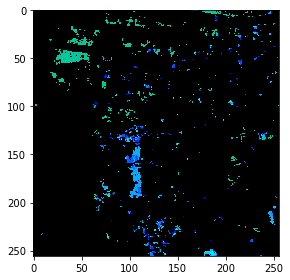

In [20]:
print("VIEW TILE:")
view.tile(36)

VIEW INPUT:
NB CLUSTERS: 32
TOTAL COUNT: 2512
TOTAL AREA: 12247
DATES: 2015-02-09 to 2018-01-22


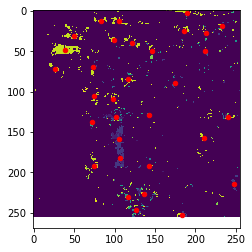

In [21]:
print("VIEW INPUT:")
view.input(36)

VIEW INPUT (without centroids):
NB CLUSTERS: 32
TOTAL COUNT: 2512
TOTAL AREA: 12247
DATES: 2015-02-09 to 2018-01-22


/Users/brook/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


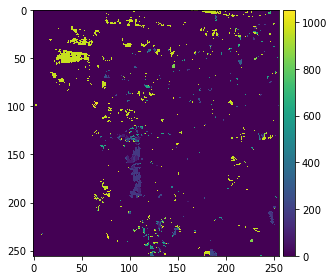

In [22]:
print("VIEW INPUT (without centroids):")
view.input(36,centroids=False)

VIEW SINGLE CLUSTER:
COUNT: 52
AREA: 448
POINT: 132,70
ZXY: 12/1367/2085
DATES: 2015-09-20 to 2018-01-06


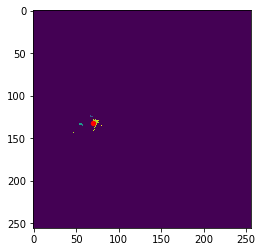

In [23]:
print("VIEW SINGLE CLUSTER:")
view.cluster(158)

VIEW SINGLE CLUSTER (with convex hull):
COUNT: 52
AREA: 448
POINT: 132,70
ZXY: 12/1367/2085
DATES: 2015-09-20 to 2018-01-06


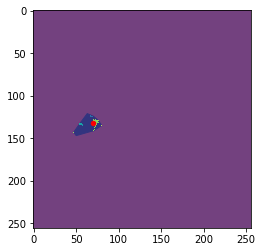

In [24]:
print("VIEW SINGLE CLUSTER (with convex hull):")
view.cluster(158,convex_hull=True)

VIEW SINGLE CLUSTER (without centriods):
COUNT: 94
AREA: 363
POINT: 192,74
ZXY: 12/1366/2082
DATES: 2016-07-28 to 2018-01-22


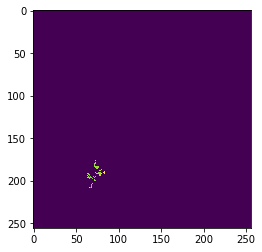

In [25]:
print("VIEW SINGLE CLUSTER (without centriods):")
view.cluster(123,centroids=False)

VIEW CLUSTERS BY LIST (with convex_hull)


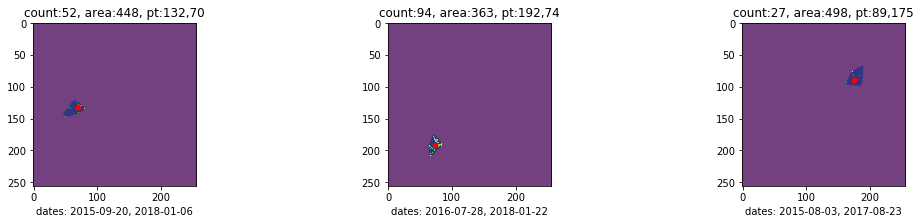

In [26]:
print("VIEW CLUSTERS BY LIST (with convex_hull)")
view.clusters(row_ids=[158,123,36],convex_hull=True)

VIEW CLUSTERS BY START,END-INDICIES (without centroids):


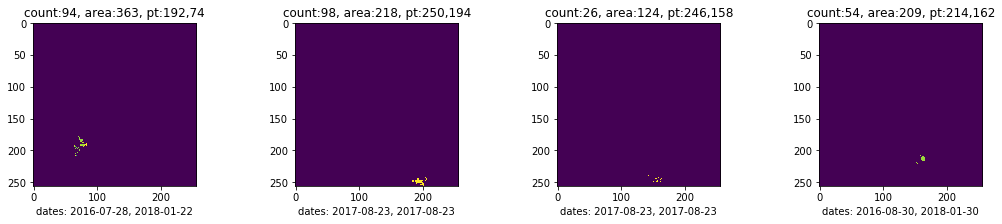

In [27]:
print("VIEW CLUSTERS BY START,END-INDICIES (without centroids):")
view.clusters(start=123,end=127,centroids=False)

---
## DOCS

---
#### ClusterService

In [28]:
help(ClusterService)

Help on class ClusterService in module utils.service:

class ClusterService(__builtin__.object)
 |  ClusterService:
 |  
 |  Creates service for running cluster algorithm and/or viewing 
 |  the resulting cluster data.
 |  
 |  Args:
 |      Use one of the following to select tiles to run:
 |  
 |          bounds<list>: tiles-lonlat bounding box
 |          tile_bounds<list>: tiles-xy bounding box
 |          lat,lon<int,int>: latitude,longitude used to run a single tile
 |          x,y<int,int>: tile-xy used to run a single tile
 |  
 |      Other run arguments:
 |  
 |          start_date<str>: 'yyyy-mm-dd'
 |          end_date<str>: 'yyyy-mm-dd'
 |          min_count<int>: minimum number of alerts in a cluster
 |          width<int>: gaussian width in cluster algorithm
 |          iterations<int>: number of times to iterate when finding clusters
 |          z<int>: tile-zoom
 |          bucket<str>: aws-bucket used for saving csv file
 |  
 |      Preloaded dataframe args:
 |  
 |  

---
#### ClusterViewer

In [29]:
help(ClusterViewer)

Help on class ClusterViewer in module utils.viewer:

class ClusterViewer(__builtin__.object)
 |  ClusterViewer:
 |          
 |  Easily plot data from ClusterService.
 |  
 |  Args:
 |      service<cluster_service>: ClusterService instance
 |      url_base<str>: aws-bucket url for glad-tiles (defaults to environ['url'])
 |  
 |  Methods defined here:
 |  
 |  __init__(self, service, url_base=None)
 |      # PUBLIC METHODS
 |  
 |  cluster(self, row_id, centroids=True, convex_hull=False, info=True)
 |      show the cluster
 |      
 |      Args:
 |          row_id<int>: row id for a cluster on the tile of interest
 |          centroids<bool[True]>: if true plot the cluster centroids
 |          convex_hull<bool[True]>: if true shade the convex_hull
 |          info<bool[True]>: if true print the cluster data
 |  
 |  clusters(self, start=None, end=None, row_ids=[], centroids=True, convex_hull=False)
 |      show clusters
 |      
 |      Use one of the following:
 |          start,end<i